# Fitting the Future with time series analysis
> What lies ahead in this chapter is you predicting what lies ahead in your data. You'll learn how to use the elegant statsmodels package to fit ARMA, ARIMA and ARMAX models. Then you'll use your models to predict the uncertain future of stock prices! This is the Summary of lecture "ARIMA Models in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time_Series_Analysis]
- image: images/arima_forecast.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Fitting time series models
- Introduction to ARMAX models
    - Exogenous ARMA
    - Use external variables as well as time series
    - ARMAX = ARMA + linear regression
- ARMAX equation
    - ARMA(1, 1) model:
$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t $$
    - ARMAX(1, 1) model:
$$ y_t = x_1 z_t + a_1 + y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t $$

### Fitting AR and MA models
In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the ```arma_generate_sample()``` function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

In [2]:
sample = pd.read_csv('./dataset/sample.csv', index_col=0)
sample.head()

timeseries_1  timeseries_2
0     -0.183108     -0.183108
1     -0.245540     -0.117365
2     -0.258830     -0.218789
3     -0.279635     -0.169041
4     -0.384736     -0.282374

#### AR(2) model

In [3]:
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(sample['timeseries_1'], order=(2, 0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                 148.855
Method:                       css-mle   S.D. of innovations              0.208
Date:                Mon, 15 Jun 2020   AIC                           -289.709
Time:                        18:46:18   BIC                           -270.078
Sample:                             0   HQIC                          -282.248
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0027      0.018     -0.151      0.880      -0.037       0.032
ar.L1.timeseries_1     0.8980      0.030     29.510      0.000       0.838       0.958
ar.L2.timeseries_1  

#### MA(3) model

In [4]:
# Instantiate the model
model = ARMA(sample['timeseries_2'], order=(0, 3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                     ARMA(0, 3)   Log Likelihood                 149.007
Method:                       css-mle   S.D. of innovations              0.208
Date:                Mon, 15 Jun 2020   AIC                           -288.014
Time:                        18:46:19   BIC                           -263.475
Sample:                             0   HQIC                          -278.687
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0018      0.012     -0.159      0.874      -0.024       0.021
ma.L1.timeseries_2     0.1995      0.031      6.352      0.000       0.138       0.261
ma.L2.timeseries_2  

### Fitting an ARMA model
n this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. 

In [5]:
earthquake = pd.read_csv('./dataset/earthquakes.csv', index_col='date', parse_dates=True)
earthquake.drop(['Year'], axis=1, inplace=True)
earthquake.head()

earthquakes_per_year
date                            
1900-01-01                  13.0
1901-01-01                  14.0
1902-01-01                   8.0
1903-01-01                  10.0
1904-01-01                  16.0

#### ARMA(3, 1) model

In [6]:
# Instantiate the model
model = ARMA(earthquake['earthquakes_per_year'], order=(3, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Mon, 15 Jun 2020   AIC                            643.345
Time:                          18:46:20   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


### Fitting an ARMAX model
In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional ```wait_times_hrs```. This may be related to an exogenous variable that you measured ```nurse_count``` which is the number of nurses on shift at any given time. These can be seen below.



In [7]:
hospital = pd.read_csv('./dataset/hospital.csv', index_col=0, parse_dates=True)
hospital.head()

wait_times_hrs  nurse_count
2019-03-04 00:00:00        1.747261          1.0
2019-03-04 01:00:00        1.664634          1.0
2019-03-04 02:00:00        1.647047          1.0
2019-03-04 03:00:00        1.619512          1.0
2019-03-04 04:00:00        1.480415          1.0

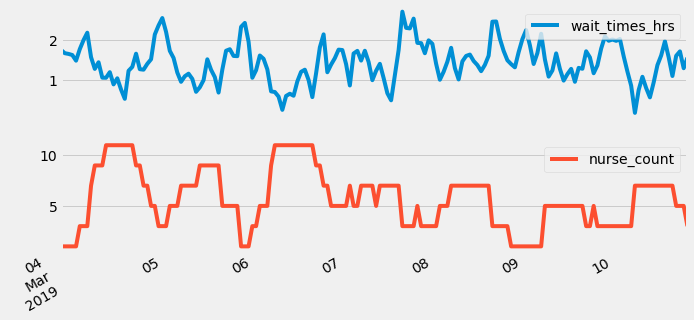

In [8]:
hospital.plot(subplots=True);

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

#### ARMAX(2, 1) model to train on the ```wait_times_hrs``` using ```nurse_count``` 

In [9]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2, 1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Mon, 15 Jun 2020   AIC                             35.668
Time:                        18:46:22   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


## Forecasting


### Generating one-step-ahead predictions
It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

In [10]:
amazon = pd.read_csv('./dataset/amazon_close.csv', parse_dates=True, index_col='date')
amazon = amazon.iloc[::-1] 

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(amazon.loc['2018-01-01':'2019-02-08'], order=(3, 1, 3), seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False,
                enforce_stationarity=False,
                simple_differencing=False, 
                measurement_error=False,
                k_trend=0)
results = model.fit()

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                  278
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -1338.384
Date:                             Mon, 15 Jun 2020   AIC                           2694.769
Time:                                     18:46:24   BIC                           2727.020
Sample:                                          0   HQIC                          2707.726
                                             - 278                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1074      0.048      2.258      0.024       0.014       0.201
ar.L2          0.0521      0.038      1.359      0.174      -0.023       0.127
ar.L3         -0.8974      0.042    -21.606      0.000      -0.979      -0.816
ma.L1         -0.1125      0.036     -3.113      0.002      -0.183      -0.042
ma.L2         -0.1496      0.041     -3.671      0.000      -0.229      -0.070
ma.L3          0.9763      0.032     30.611      0.000       0.914       1.039
ar.S.L7        0.1821      0.675      0.270      0.787      -1.141       1.506
ma.S.L7       -0.2247      0.666     -0.337      0.736      -1.531       1.081
sigma2      1319.0972     99.104     13.310      0.000    1124.858    1513.337
===================================================================================
Ljung-Box (Q):                       28.84   Jarque-Bera (JB):                22.02
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast.values)

[1475.3973982  1462.84752096 1470.99540557 1498.12115484 1537.51838107
 1508.09054892 1581.14926322 1627.24259216 1650.12797834 1649.53776158
 1657.7163931  1648.12485235 1625.78085085 1671.04311494 1672.23342965
 1683.43565237 1693.6949342  1642.5733451  1657.25345019 1652.28661236
 1661.06421713 1620.90897063 1594.76080937 1679.5496602  1724.90278402
 1629.30624018 1638.13065893 1647.51124676 1636.55265666 1606.68029738]


### Plotting one-step-ahead predictions
Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

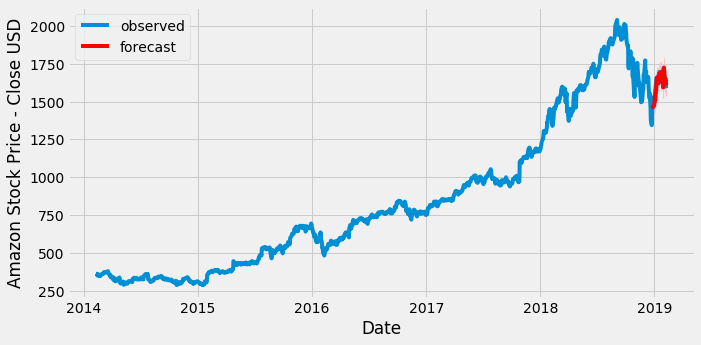

In [14]:
# Plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed');

# Plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast');

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink');

# Set labels, legends
plt.xlabel('Date');
plt.ylabel('Amazon Stock Price - Close USD');
plt.legend();

### Generating dynamic forecasts
Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [15]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:, 'lower close']
upper_limits = confidence_intervals.loc[:, 'upper close']

# Print bet estimate predictions
print(mean_forecast.values)

[1475.3973982  1476.40017466 1468.3901068  1467.14976272 1468.18656451
 1478.14922455 1476.87176087 1480.11773026 1472.62955383 1469.88023553
 1466.93794607 1473.65129549 1477.18299701 1479.91259781 1475.05662359
 1471.72120655 1468.06637732 1471.97702823 1475.28213547 1479.2113115
 1476.17980423 1473.21901888 1469.25578864 1471.28791358 1473.97822619
 1477.94469229 1476.70394567 1474.34205877 1470.48718766 1471.07043809]


### Plotting dynamic forecasts
Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

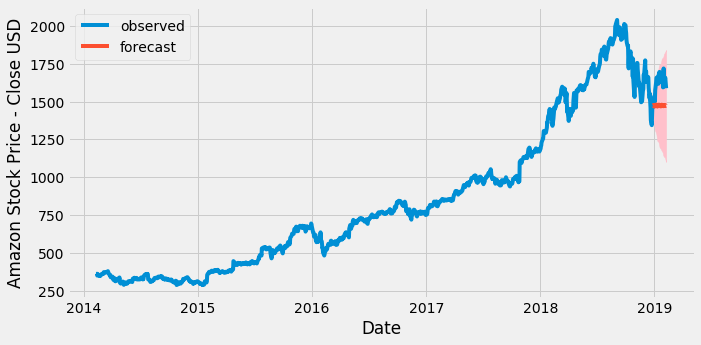

In [16]:
# Plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed');

# Plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, label='forecast');

# Shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink');

# set labels, legends
plt.xlabel('Date');
plt.ylabel('Amazon Stock Price - Close USD');
plt.legend();

## Intro to ARIMA models
- The ARIMA model
    - Take the difference
    - Fit ARMA model
    - Integrate forecast
- ARIMA - Autoregressive Integrated Moving Average

### Differencing and fitting ARMA
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

In [17]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2, 2) model
arma = SARIMAX(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.159
Date:                Mon, 15 Jun 2020   AIC                          11072.319
Time:                        18:46:30   BIC                          11098.005
Sample:                             0   HQIC                         11081.972
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0770      0.004    259.224      0.000       1.069       1.085
ar.L2         -0.9950      0.004   -273.566      0.000      -1.002      -0.988
ma.L1         -1.0915      0.006   -177.349      0.0

### Unrolling ARMA forecast
Now you will use the model that you trained in the previous exercise ```arma``` in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

In [18]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    1593.660837
1259    1601.964525
1260    1605.494152
1261    1601.033697
1262    1592.717948
1263    1588.199887
1264    1591.607802
1265    1599.773421
1266    1605.177031
1267    1602.872224
dtype: float64


/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


### Fitting an ARIMA model
In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

In [19]:
# Create ARIMA(2, 1, 2) model
arima = SARIMAX(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    1593.662417
1260    1601.932909
1261    1605.426182
1262    1600.960117
1263    1592.674090
1264    1588.192669
1265    1591.609853
1266    1599.749278
1267    1605.116372
1268    1602.799012
dtype: float64


/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


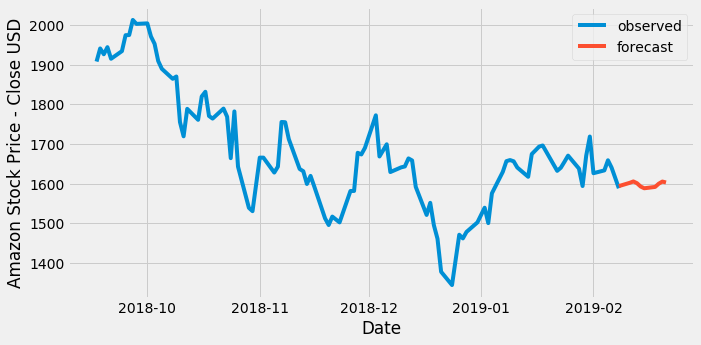

In [21]:
# Plot the amazon data
plt.plot(amazon.index[-100:], amazon.iloc[-100:]['close'], label='observed');

# Plot your mean forecast
rng = pd.date_range(start='2019-02-08', end='2019-02-21', freq='b')
plt.plot(rng, arima_value_forecast.values, label='forecast');

# Shade the area between your confidence limits
# plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink');

# set labels, legends
plt.xlabel('Date');
plt.ylabel('Amazon Stock Price - Close USD');
plt.legend();
plt.savefig('../images/arima_forecast.png')